In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [155]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic polynomial data: y = 5x^3 - 4x^2 + 3x + noise
np.random.seed(42)
X_train = np.random.uniform(-2, 2, (1000, 1))  # Input features
y_train = 5 * X_train**3 - 4 * X_train**2 + 3 * X_train + np.random.randn(1000, 1) * 0.5  # Add noise


In [156]:
model = keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=(1,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)


In [157]:
# Generate test data (smooth curve) and predictions
X_test = np.linspace(-2, 2, 100).reshape(-1, 1)  # Generate smooth range of X values
y_pred = model.predict(X_test)  # Predict using trained model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


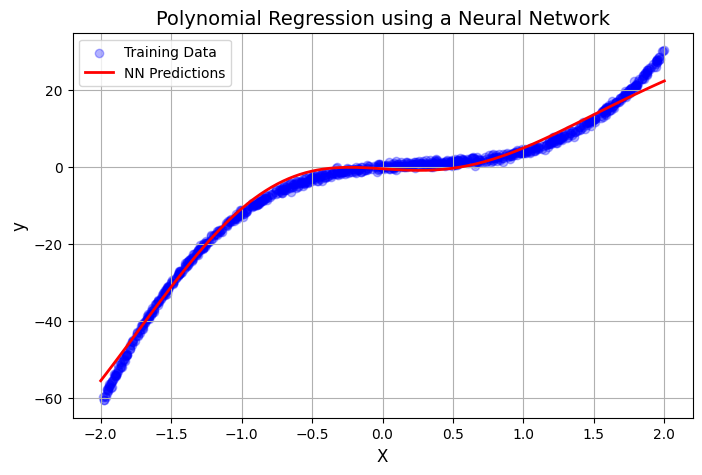

In [158]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.3, label="Training Data")  # Scatter plot for training data
plt.plot(X_test, y_pred, color='red', linewidth=2, label="NN Predictions")  # Line plot for NN predictions
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend()
plt.title("Polynomial Regression using a Neural Network", fontsize=14)
plt.grid(True)
plt.show()